# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [57]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,8)})

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [58]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [59]:
print('No. of rows in the dataset: {}'.format(df.shape[0]))

No. of rows in the dataset: 294478


**c.** The number of unique users in the dataset.

In [60]:
print('No. of unique users in the dataset: {}'.format(df.user_id.nunique()))

No. of unique users in the dataset: 290584


**d.** The proportion of users converted.

In [61]:
df.query('converted == 1').user_id.count()/df.user_id.count()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [62]:
count_wrong_treatment = df.query('group =="treatment" & landing_page != "new_page"').user_id.count()
count_wrong_control = df.query('group =="control" & landing_page != "old_page"').user_id.count()
count = count_wrong_treatment + count_wrong_control 
print(count)

3893


**f.** Do any of the rows have missing values?

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There are no rows with missing values

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [64]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df
df2.drop(df2.query('group == "treatment" & landing_page == "old_page"').index, inplace =True)
df2.drop(df2.query('group == "control" & landing_page == "new_page"').index, inplace =True)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [65]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [66]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [67]:
df2[df2.duplicated(['user_id'], keep=False)].user_id

1899    773192
2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [68]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [69]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 

df2.drop(1899, inplace=True)

# Check again if the row with a duplicate user_id is deleted or not


In [70]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>




In [71]:
total_users = df2.user_id.count()
converted = df2[df2['converted'] == 1].user_id.count()
prob_converted = converted / total_users
print('The probability of an individual converting regardless of the page they recieve is {}'. format(prob_converted))

The probability of an individual converting regardless of the page they recieve is 0.11959708724499628


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [72]:
control_group = df2[df2['group'] == 'control']
total_control_users = control_group.user_id.count()
converted_control_users = control_group[control_group['converted'] == 1].user_id.count() 
prob_control_converted = converted_control_users / total_control_users
print('The probability of an individual converting given the individual was in control group is {}'. format(prob_control_converted))

The probability of an individual converting given the individual was in control group is 0.1203863045004612


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [73]:
treatment_group = df2[df2['group'] == 'treatment']
total_treatment_users = treatment_group.user_id.count()
converted_treatment_users = treatment_group[treatment_group['converted'] == 1].user_id.count() 
prob_treatment_converted = converted_treatment_users / total_treatment_users
print('The probability of an individual converting given the individual was in treatment group is {}'. format(prob_treatment_converted))

The probability of an individual converting given the individual was in treatment group is 0.11880806551510564


In [74]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = prob_treatment_converted - prob_control_converted
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [75]:
total_users = df2.user_id.count()
new_page_count = df2[df2['landing_page'] == 'new_page'].user_id.count()
prob_new_page = new_page_count / total_users
print('The probability that an individual received the new page is {}'. format(prob_new_page))

The probability that an individual received the new page is 0.5000619442226688


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**Explantion**:<br>
As seen in the result of the obs_diff, the conversion rate of the new page is lesser than that of the old page. Further statistical tests such as hypothesis testing is required to gather more evidence and make a conclusion.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>Our Null Hypothesis **$H_0$** will be **$p_{new}$ - $p_{old}$ <= 0** <br>
>Our Alternative Hypothesis **$H_1$** will be **$p_{new}$ - $p_{old}$ > 0**

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [76]:
# Assuming that P-New and P-Old are equal and they are equal to the conversion rate of df2 regardless of the page
total_users = df2.user_id.count()
converted = df2[df2['converted'] == 1].user_id.count()
p_new = converted / total_users
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [77]:
# P-Old will be the same as P-New
p_old = converted / total_users
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br>

In [78]:
n_new = df2[df2['group'] == 'treatment'].user_id.count()
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [79]:
n_old = df2[df2['group'] == 'control'].user_id.count()
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [80]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice ([0,1], p =[ 1-p_new, p_new], size = [1, n_new])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [81]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice ([0,1], p =[ 1-p_old, p_old], size = [1, n_old])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [82]:
p_new_sim = new_page_converted.mean()
p_old_sim = old_page_converted.mean()
p_new_sim - p_old_sim

0.00038314135770760316


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [83]:
# Sampling distribution 
p_diffs = []
for _ in range (10000):
    new_page_converted = np.random.choice([0,1], p = [0.8805, 0.1195], size = [1, n_new])
    old_page_converted = np.random.choice ([0,1], p =[ 0.8805, 0.1195], size = [1, n_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

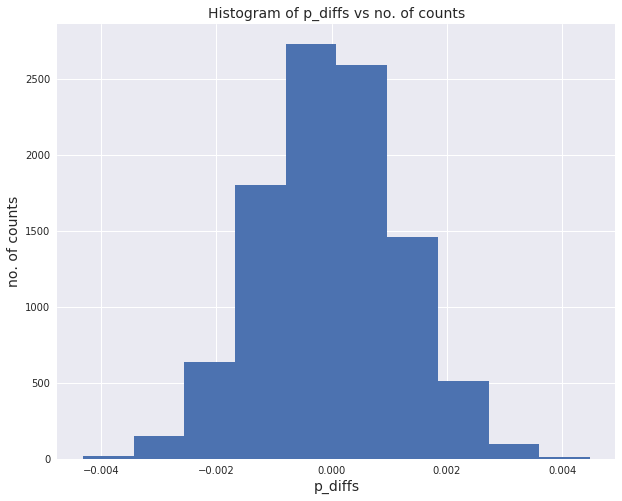

In [84]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.xlabel('p_diffs', fontsize = 14);
plt.ylabel('no. of counts', fontsize = 14);
plt.title('Histogram of p_diffs vs no. of counts', fontsize = 14);

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

Observed difference is -0.0015782389853555567
The P Value is 0.9044


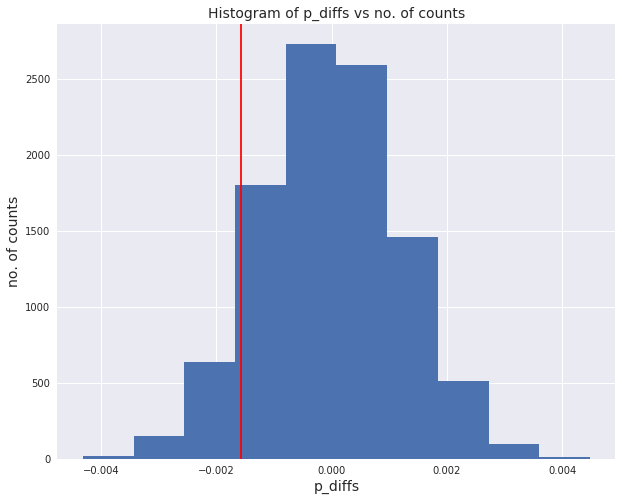

In [85]:
obs_diff = prob_treatment_converted - prob_control_converted
print('Observed difference is {}'.format(obs_diff))
plt.hist(p_diffs);
plt.xlabel('p_diffs', fontsize = 14);
plt.ylabel('no. of counts', fontsize = 14);
plt.axvline(x=obs_diff, color = 'red');
plt.title('Histogram of p_diffs vs no. of counts', fontsize = 14);
p_value = (p_diffs > obs_diff).mean()
print('The P Value is {}'. format(p_value))

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>**Explanation**:
* Our Null hypothesis states that the old page is better than the new page. 
* The Type I error rate provided to us is 0.05. If the obtained p-value is greater than the type I error rate, then we fail to reject the null hypothesis.  
* The value we calculated in section 'j' is called the 'p-value'. P-value can be defined as the probability of observing our statistic or a more extreme statistic from the null hypothesis. In this case, the p-value = 0.9085. 
* P-value is larger than the type I error rate of 0.05. Therefore we fail to reject the null hypothesis. Meaning the old page has a better probability of conversion than the new page. 

 



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [86]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = converted_control_users

# number of conversions with the new_page
convert_new = converted_treatment_users

# number of individuals who were shown the old_page
n_old = control_group.user_id.count()

# number of individuals who received new_page
n_new = treatment_group.user_id.count()

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

In [87]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'larger')
z_score, p_value

(1.3109241984234394, 0.094941687240975514)

**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Interpretation of test statistic:** <br> Our hypothesis is a right-tailed test. $Z_{\alpha}$ for a one-tailed test is 1.645 and since the $Z_{score}$ we calculated (1.31) is less than $Z_{\alpha}$, we fail to reject the null hypothesis.

>**Interpretation of p-value:** <br>
P-value = 0.0949 is larger than the type 1 error rate of 0.05. Therefore we fail to reject the null hypothesis under the type 1 error threshold of 0.05.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Explanation**:<br>
Logistic Regression is to be performed in this case since the predicted response variable is limited to a probability between 0 and 1.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [88]:
# Creating the intercept and the dummy variable based on the 'group'
df2['intercept']=1
df2['ab_page'] = pd.get_dummies (df2['group'])['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [89]:
# create and fit the model
log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [90]:
# Summary of the model
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-23 21:25 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [91]:
# Calculating the exponential value of co-efficient from the above
1/np.exp(-0.0150)

1.0151130646157189

>**Interpretation:** <br>
For each one unit decrease in the user receiving a new page, the conversion rate is 1.015 times as likely holding all else constant. 

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  




>**Explanations**: <br>
* The p-value associated with the ab_page is 0.1899.<br>
* It differs from the p-value found in Part II, which is 0.9075, because the null and alternative hypothesis in both the cases are different.<br> 
* In Part II, the null hypothesis was that there is an equal probability of conversion when the users receive an old page or a new page. The alternative hypothesis is to prove this statement wrong.<br>
* Whereas in our regression model, we analyze the conversion rate impact based on the landing page received by the user, holding all other variables constant.<br> 
* The p-value of 0.1899 is greater than the Type I error rate of 0.05. Therefore, we fail to reject the null hypothesis. 


**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Explanation:** <br>
> * Other factors like the timestamp of page visit or the country of the user can influence the conversion rate. Considering more factors will help us make our hypothesis test statistically more significant. 
> * The disadvantage of adding additional variables into the regresssion model is in the basic assumption behind multiple linear regression models that the predictor variables are not correlated to each other. The variables can be subject to multicollinearity and can be related to each other.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [92]:
# Read the countries.csv
df_countries = pd.read_csv('./countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [93]:
# Join with the df2 dataframe
df_merged = df_countries.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [94]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [95]:
# Fit your model, and summarize the results and dropping one country
log_model = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK', 'US']])
result = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [96]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-23 21:25 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [97]:
np.exp(0.0506), np.exp(0.0408)

(1.0519020483004984, 1.0416437559600236)

>**Interpretation**<br>
* From the above exponential values of the coefficients for countries, it appears that country does not have an impact on conversion. Also, the relevant p-values are insignificant for each variable.

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [98]:
# Creating the additional columns for interaction between page and country
df_merged['US_ab_page'] = df_merged['US'] * df_merged['ab_page']
df_merged['UK_ab_page'] = df_merged['UK'] * df_merged['ab_page']
df_merged['CA_ab_page'] = df_merged['CA'] * df_merged['ab_page']


In [99]:
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,US_ab_page,UK_ab_page,CA_ab_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [100]:
# model the data
log_mod = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'US', 'UK', 'US_ab_page', 'UK_ab_page']])
result = log_mod.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-10-23 21:25 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

In [101]:
np.exp(result.params)

intercept     0.134794
ab_page       0.934776
US            1.017682
UK            1.011854
US_ab_page    1.048001
UK_ab_page    1.081428
dtype: float64

In [102]:
# To obtain the reciprocal of co-efficient of ab_page for easy interpretation
1/0.934776

1.069775004920965

## Interpretation & Conclusion

* The p-value of intercept is less than the type I error rate of 0.05, which is statistically significant. All other p-values are greater than the type I error rate and are statistically not significant. <br>


* For every one unit decrease in the ab_page, converstion rate is 1.07 times as likely holding all else constant. <br>


* The country of the user also did not have a statistically significant impact on the conversion rate. <br>


* When the user country is US and receives a new page, the conversion rate is 1.04 times more likely while holding all else constant. <br>


* When the user country is UK and receives a new page, the conversion rate is 1.08 times more likely while holding all else constant. <br>


* From the above exponential values of the coefficients, it is clear that the interaction between page and country does not have a statistical significance on the conversion rate. <br>


* **Therefore, based on the statistical tests performed so far, the recommendation to the company would be to keep the old page.** <br>



In [103]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0